# 11. Local features – matching

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = 'data' # Change this, according to your images' directory path

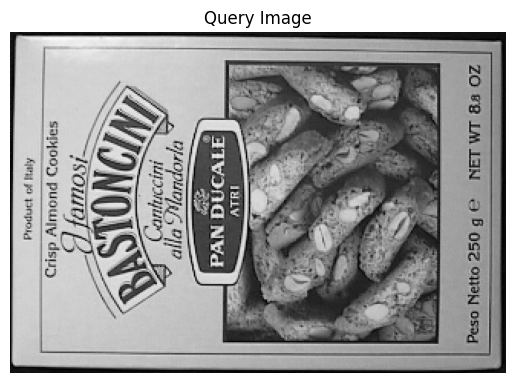

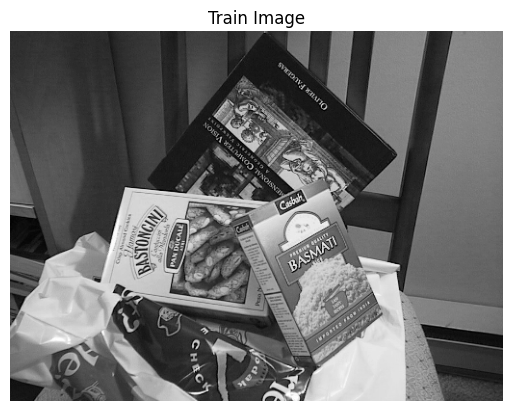

In [2]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

Detect the keypoints in two different images (ex: with different scales, taken from different viewpoints, …) and draw
the found matches, like in figure 3. Try different sets of images, keypoint detectors, matchers and visualization of the
matches:
- SIFT or ORB for keypoint detection;
- Brute Force or FLANN for matching, with the alternatives match() or KnnMatch(); choose an appropriate
distance measure;
- drawMatches() (match()) or drawMatchesKnn() (KnnMatch()) for displaying the results.

In [3]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

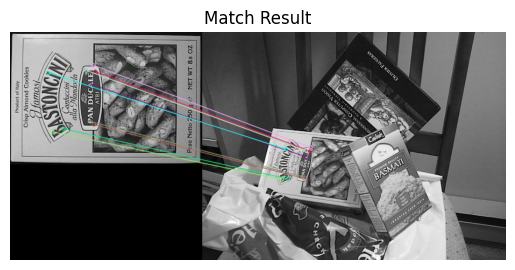

In [4]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()